In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import cv2

In [2]:
path= "C:/Users/GavinChoi/OneDrive - McGill University/Desktop/ECSE 415/"
pic1 = 'first.jpg'
pic2 = 'second.jpg'

#### 1. Image Acquisition

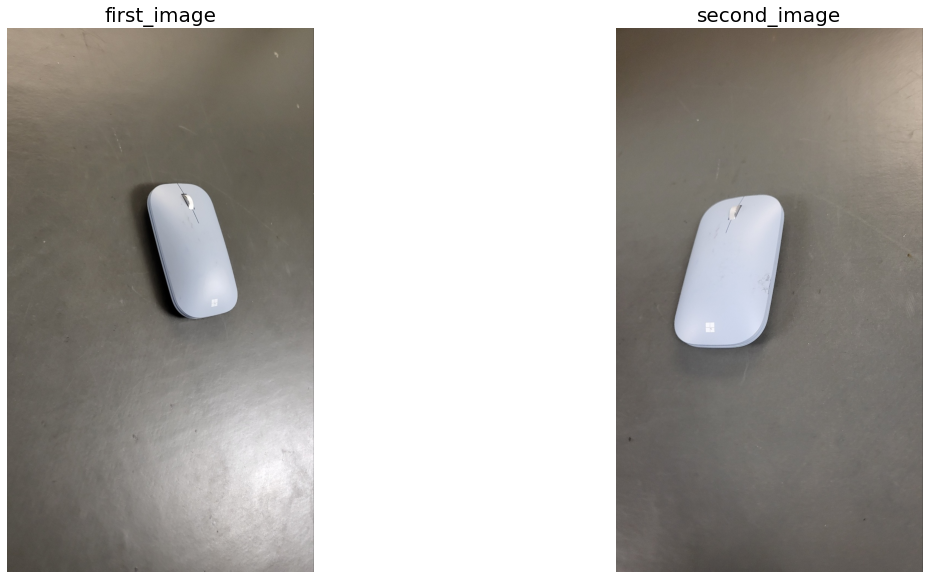

In [3]:

first_image = cv2.imread(path + pic1) #numpy arrays that contains BGR values of pixels 
second_image = cv2.imread(path + pic2)


first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB) #convert BGR to RGB  
second_image = cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB) # ex) first_image[0][0] => tuple(R,G,B)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(first_image)
plt.title("first_image",fontsize=20), plt.axis("off")
plt.subplot(122), plt.imshow(second_image)
plt.title("second_image",fontsize=20), plt.axis("off")
plt.show()

#### 2. Convert to Grayscale

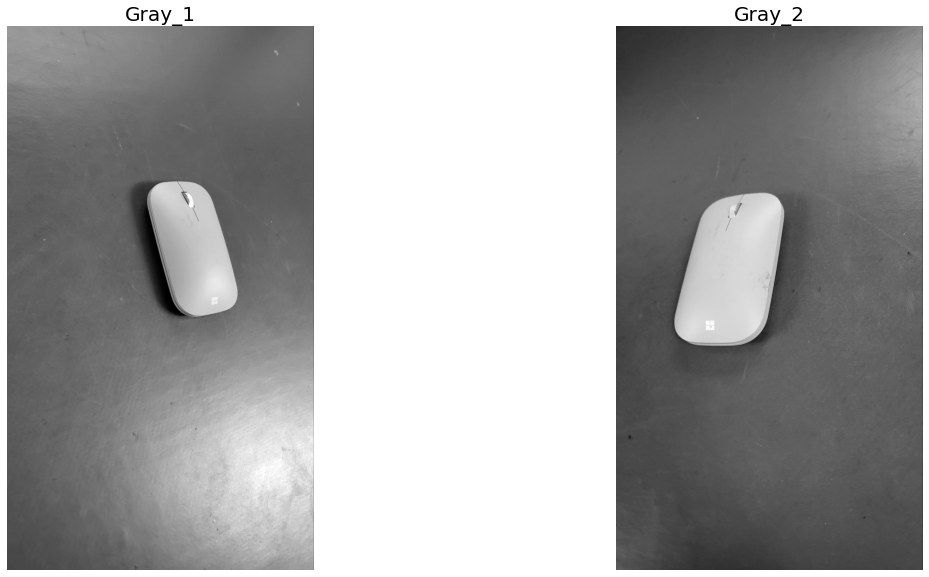

In [4]:

#find the average values of each pixel's R,G,B values
gray_first_image = np.mean(first_image, axis=2).astype(dtype=np.float64) # shape =(y,x) 
gray_second_image = np.mean(second_image, axis=2).astype(dtype=np.float64)

plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(gray_first_image , cmap='gray')
plt.title("Gray_1",fontsize=20)
plt.axis("off")
plt.subplot(122), plt.imshow(gray_second_image, cmap='gray')
plt.title("Gray_2",fontsize=20)
plt.axis("off")
plt.show()

#### 3. Smooth the images using Gaussian Smooting


In [5]:
def get_gauss__kernel(size,std):
    # initialize size x size matrix and offset
    GaussKernel = np.zeros((size,size))
    offset = size // 2
    # Gaussian Function in 2D
    e = lambda x: np.exp(x)
    power = lambda x, y: (x**2+y**2)/ (2*std**2)
    G_sig = lambda x, y : (1 / (2 * math.pi * (std)**2)) * e(-power(x,y))
    

    for i in range(size):
        y = offset - i
        for j in range(size):
            x = offset - j
            GaussKernel[i][j] = G_sig(y,x)
    return np.array(GaussKernel, dtype=np.float32)

# get Gaussian Filters with standard diviation  = 5 
GaussKernel_5x5 = get_gauss__kernel(size=5, std=5)
GaussKernel_11x11 = get_gauss__kernel(size=11, std=5) 

# implementing 5x5 pixel Gaussian Kernel using OpenCV 
Filtered1_5x5= cv2.filter2D(gray_first_image,-1,GaussKernel_5x5)
Filtered2_5x5 = cv2.filter2D(gray_second_image,-1,GaussKernel_5x5)

# implementing 11x11 pixel Gaussian Kernel using OpenCV 
Filtered1_11x11 = cv2.filter2D(gray_first_image,-1,GaussKernel_11x11)
Filtered2_11x11 = cv2.filter2D(gray_second_image,-1,GaussKernel_11x11)

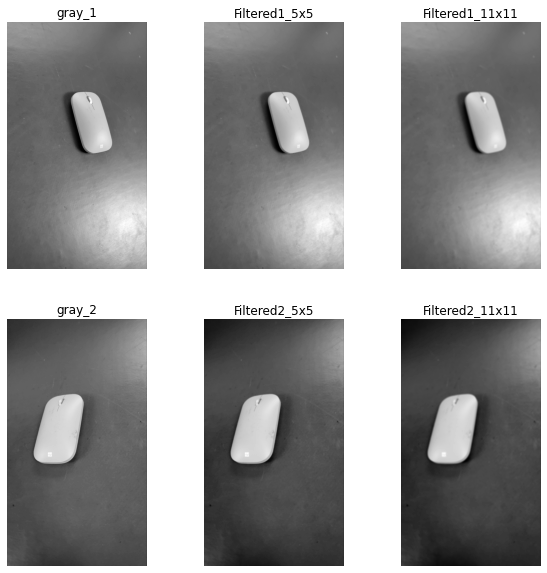

In [6]:

fig, axes = plt.subplots(2,3,figsize=(10,10))
axes[0,0].imshow(gray_first_image, cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("gray_1")
axes[0,1].imshow(Filtered1_5x5, cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("Filtered1_5x5")
axes[0,2].imshow(Filtered1_11x11, cmap='gray'),axes[0,2].axis('off')
axes[0,2].set_title("Filtered1_11x11")
axes[1,0].imshow(gray_second_image, cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("gray_2")
axes[1,1].imshow(Filtered2_5x5, cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("Filtered2_5x5")
axes[1,2].imshow(Filtered2_11x11, cmap='gray'),axes[1,2].axis('off')
axes[1,2].set_title("Filtered2_11x11")
plt.show()

#### 4 Compute Image Gradients

In [7]:

y_difference_kernel = np.array([[-1,-3,-1],[0,0,0],[1,3,1]], dtype=np.float64)/(9)
x_difference_kernel = np.array([[-1,0,1],[-3,0,3],[-1,0,1]], dtype=np.float64)/(9)

x_diff1_5x5 = cv2.filter2D(Filtered1_5x5,-1,x_difference_kernel)
x_diff2_5x5 = cv2.filter2D(Filtered2_5x5,-1,x_difference_kernel)

y_diff1_5x5 = cv2.filter2D(Filtered1_5x5,-1,y_difference_kernel)
y_diff2_5x5 = cv2.filter2D(Filtered2_5x5,-1,y_difference_kernel)

x_diff1_11x11 = cv2.filter2D(Filtered1_11x11,-1,x_difference_kernel)
x_diff2_11x11 = cv2.filter2D(Filtered2_11x11,-1,x_difference_kernel)

y_diff1_11x11 = cv2.filter2D(Filtered1_11x11,-1,y_difference_kernel)
y_diff2_11x11 = cv2.filter2D(Filtered2_11x11,-1,y_difference_kernel)

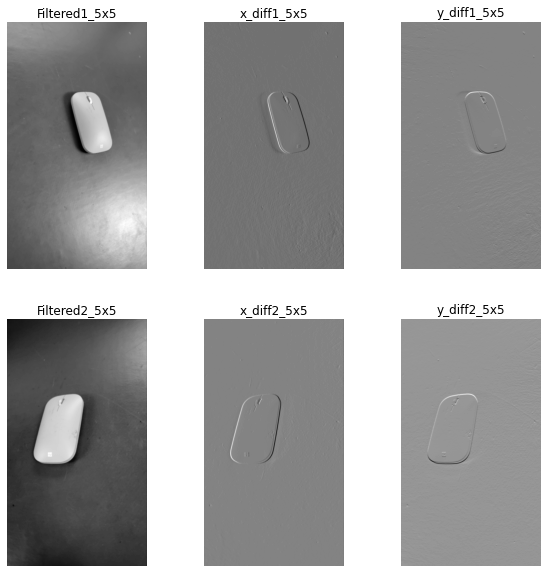

In [8]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
axes[0,0].imshow(Filtered1_5x5, cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("Filtered1_5x5")
axes[0,1].imshow(x_diff1_5x5, cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("x_diff1_5x5")
axes[0,2].imshow(y_diff1_5x5, cmap='gray'),axes[0,2].axis('off')
axes[0,2].set_title("y_diff1_5x5")
axes[1,0].imshow(Filtered2_5x5, cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("Filtered2_5x5")
axes[1,1].imshow(x_diff2_5x5, cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("x_diff2_5x5")
axes[1,2].imshow(y_diff2_5x5, cmap='gray'),axes[1,2].axis('off')
axes[1,2].set_title("y_diff2_5x5")
plt.show()

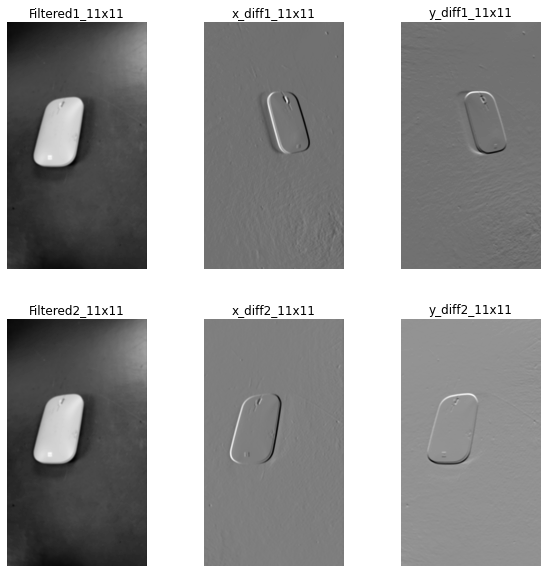

In [9]:
fig, axes = plt.subplots(2,3,figsize=(10,10))
axes[0,0].imshow(Filtered2_11x11, cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("Filtered1_11x11")
axes[0,1].imshow(x_diff1_11x11, cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("x_diff1_11x11")
axes[0,2].imshow(y_diff1_11x11, cmap='gray'),axes[0,2].axis('off')
axes[0,2].set_title("y_diff1_11x11")
axes[1,0].imshow(Filtered2_11x11, cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("Filtered2_11x11")
axes[1,1].imshow(x_diff2_11x11, cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("x_diff2_11x11")
axes[1,2].imshow(y_diff2_11x11, cmap='gray'),axes[1,2].axis('off')
axes[1,2].set_title("y_diff2_11x11")
plt.show()

#### 5 Compute the Harris Cornerness Function

In [10]:
def get_harris_Cornerness(x_diff,y_diff, a=0.05):
    
    x_diff_2 = x_diff*x_diff
    y_diff_2 = y_diff*y_diff
    xy_diff = x_diff*y_diff

    detM = x_diff_2 * y_diff_2 - xy_diff**2
    trace_M2 = (x_diff_2 + y_diff_2)**2
    har = detM - a*trace_M2
    
    return har

In [11]:
har1_11x11 = get_harris_Cornerness(x_diff1_11x11, y_diff1_11x11)
har1_5x5 = get_harris_Cornerness(x_diff1_5x5, y_diff1_5x5)
har2_11x11 = get_harris_Cornerness(x_diff2_11x11, y_diff2_11x11)
har2_5x5 = get_harris_Cornerness(x_diff2_5x5, y_diff2_5x5)


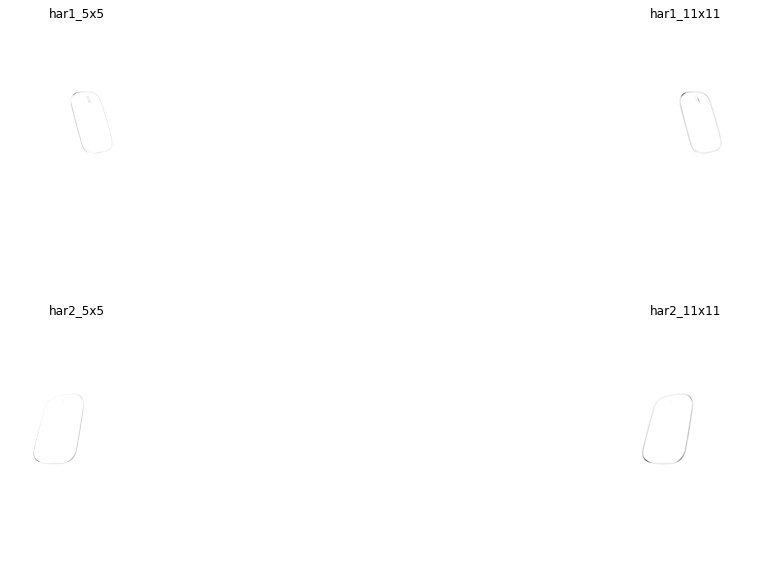

In [12]:
fig, axes = plt.subplots(2,2,figsize=(20,10))
axes[0,0].imshow(har1_5x5, cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("har1_5x5")
axes[0,1].imshow(har1_11x11, cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("har1_11x11")
axes[1,0].imshow(har2_5x5, cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("har2_5x5")
axes[1,1].imshow(har2_11x11, cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("har2_11x11")
plt.show()

#### 6 Threshold the Harris Cornerness Function

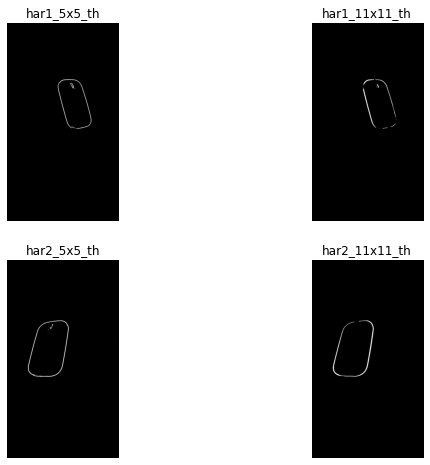

In [13]:
#I repeated experimentation with different threshold values
#until I can barely see the edges of the object in the image.
#For the first image, the best threshold value is the same for
#both smoothing levels. However, I used different values for the 
#second picture but the difference is small.

har1_11x11_th = np.array(har1_11x11 < np.percentile(har1_11x11, 0.35), dtype=np.float32)
har1_5x5_th = np.array(har1_5x5 < np.percentile(har1_5x5, 0.35), dtype=np.float32)
har2_11x11_th = np.array(har2_11x11 < np.percentile(har2_11x11, 0.55), dtype=np.float32)
har2_5x5_th = np.array(har2_5x5 < np.percentile(har2_5x5, 0.48), dtype=np.float32)

fig, axes = plt.subplots(2,2,figsize=(10,8))
axes[0,0].imshow(har1_5x5_th, cmap='gray'),axes[0,0].axis('off')
axes[0,0].set_title("har1_5x5_th")
axes[0,1].imshow(har1_11x11_th ,cmap='gray'),axes[0,1].axis('off')
axes[0,1].set_title("har1_11x11_th")
axes[1,0].imshow(har2_5x5_th, cmap='gray'),axes[1,0].axis('off')
axes[1,0].set_title("har2_5x5_th")
axes[1,1].imshow(har2_11x11_th ,cmap='gray'),axes[1,1].axis('off')
axes[1,1].set_title("har2_11x11_th")
plt.show()

#### 7 Apply Non-maximum Suppression

In [14]:

def non_max_suppression(img, phase):
    tmp_mat = np.zeros_like(img, dtype=int)
    for i in range(1,len(img)-1): 
        for j in range(1,len(img[0])-1): 
            r = 255
            q = 255

            if (0 <= img[i,j] < 22.5) or (157.5 <= img[i,j] <= 180):
                r = img[i, j-1]
                q = img[i, j+1]

            elif (22.5 <= phase[i,j] and phase[i,j] < 67.5):
                r = img[i-1, j+1]
                q = img[i+1, j-1]

            elif (67.5 <= phase[i,j] and phase[i,j] < 112.5):
                r = img[i-1, j]
                q = img[i+1, j]

            elif (112.5 <= phase[i,j] and phase[i,j] < 157.5):
                r = img[i+1, j+1]
                q = img[i-1, j-1]

            if  img[i,j] >= r and img[i,j] >= q:
                tmp_mat[i,j] = img[i,j]
            else:
                tmp_mat[i,j] = 0
    
    return tmp_mat

In [15]:
phase1 = cv2.phase(x_diff2_11x11,y_diff2_11x11)* 180. / np.pi
phase2 = cv2.phase(x_diff2_11x11,y_diff2_11x11)* 180. / np.pi
phase1[phase1 < 0] += 180
phase2[phase2 < 0] += 180

# apply non_maximum suppression
har1_5x5_th_sup = non_max_suppression(har1_5x5_th, phase1)
har1_11x11_th_sup = non_max_suppression(har1_11x11_th, phase1)
har2_5x5_th_sup = non_max_suppression(har2_5x5_th, phase2)
har2_11x11_th_sup = non_max_suppression(har2_11x11_th, phase2)



har1_5x5_th_sup = np.where(har1_5x5_th_sup!=1,gray_first_image,255) # find the pixels location and replace its value with 255 to display red lines
har1_5x5_th_sup = np.dstack((har1_5x5_th_sup, gray_first_image,gray_first_image)).astype(int) #convert (x,y) shape to (x,y,3) to display the grayscale image with red lines
har1_11x11_th_sup = np.where(har1_11x11_th_sup!=1,gray_first_image,255)
har1_11x11_th_sup = np.dstack((har1_11x11_th_sup, gray_first_image,gray_first_image)).astype(int)

har2_5x5_th_sup = np.where(har2_5x5_th_sup!=1,gray_second_image,255)
har2_5x5_th_sup = np.dstack((har2_5x5_th_sup, gray_second_image,gray_second_image)).astype(int)

har2_11x11_th_sup = np.where(har2_11x11_th_sup!=1,gray_second_image,255)
har2_11x11_th_sup = np.dstack((har2_11x11_th_sup, gray_second_image,gray_second_image)).astype(int)

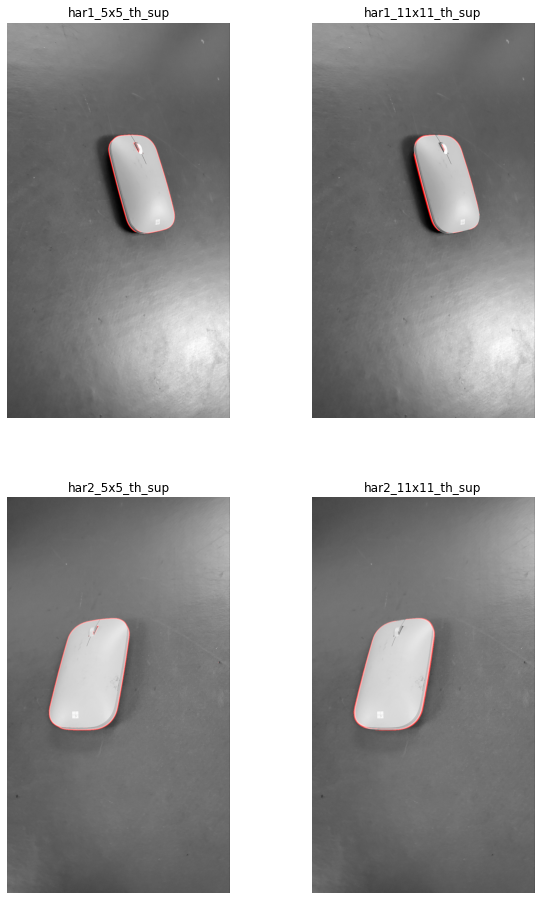

In [16]:


fig, axes = plt.subplots(2,2,figsize=(10,16))
axes[0,0].imshow(har1_5x5_th_sup),axes[0,0].axis('off')
axes[0,0].set_title("har1_5x5_th_sup")
axes[0,1].imshow(har1_11x11_th_sup),axes[0,1].axis('off')
axes[0,1].set_title("har1_11x11_th_sup")
axes[1,0].imshow(har2_5x5_th_sup),axes[1,0].axis('off')
axes[1,0].set_title("har2_5x5_th_sup")
axes[1,1].imshow(har2_11x11_th_sup),axes[1,1].axis('off')
axes[1,1].set_title("har2_11x11_th_sup")
plt.show()